In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import skewnorm

In [5]:
df= sns.load_dataset("penguins")
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [7]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [9]:
df = df.select_dtypes(exclude=["object"])
df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0
...,...,...,...,...
339,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0
341,50.4,15.7,222.0,5750.0
342,45.2,14.8,212.0,5200.0


In [27]:
results =[]

for col in df.columns:

    results.append({
        "Mean": df[col].mean(),
        "Median": df[col].median(),
        "Mode": df[col].mode().iloc[0]
    })
df1 = pd.DataFrame(results)
df1
    

,Mean,Median,Mode
0,43.921930,44.45,41.1
1,17.151170,17.30,17.0
2,200.915205,197.00,190.0
3,4201.754386,4050.00,3800.0


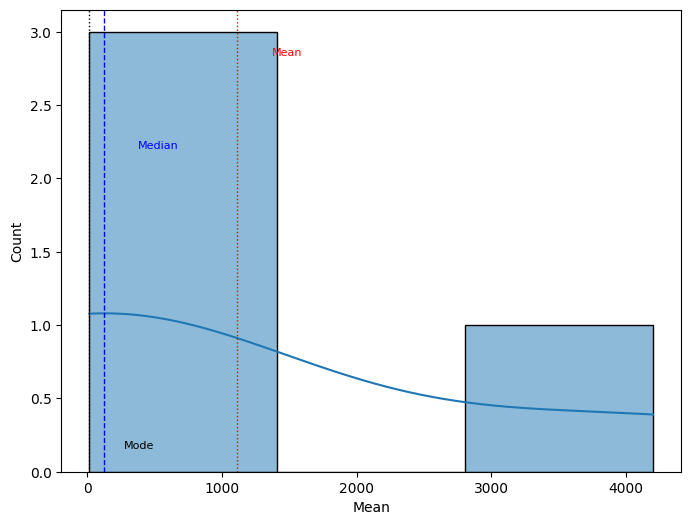

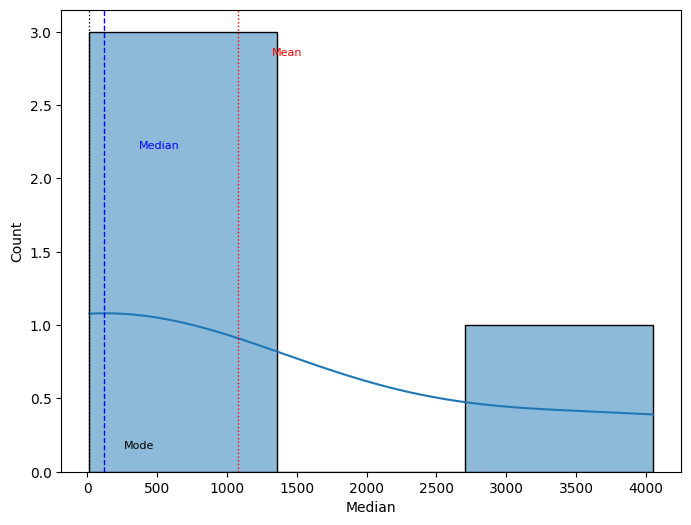

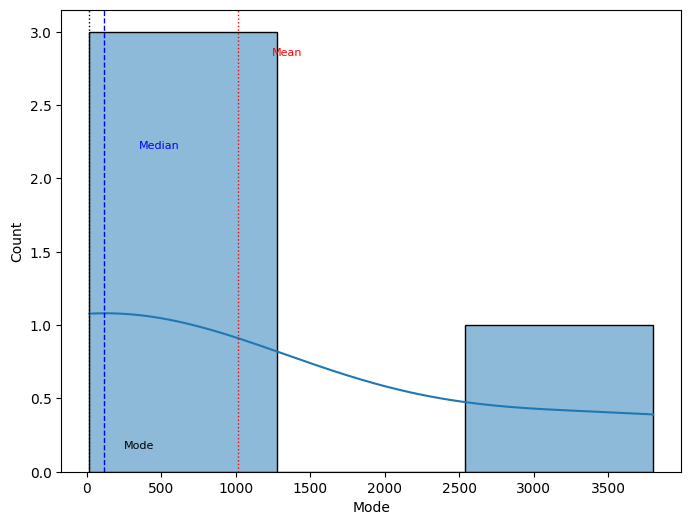

In [28]:
for col in df1.columns:
    fig, axes= plt.subplots(figsize=(8,6))
    sns.histplot(data=df1, x=col, kde=True)

    plt.axvline(df1[col].mean(), color="r", linestyle=":", linewidth=1)
    plt.text(df1[col].mean() + df1[col].std()/8, s="Mean", y=axes.get_ylim()[1]*0.90,
             fontsize = 8, color="r")
    
    plt.axvline(df1[col].median(), color="blue", linestyle="--", linewidth=1)
    plt.text(df1[col].median() + df1[col].std()/8, s="Median", y=axes.get_ylim()[1]*0.70,
             fontsize = 8, color="blue")
    
    plt.axvline(df1[col].mode().iloc[0], color="k", linestyle=":", linewidth=1)
    plt.text(df1[col].mode().iloc[0] + df1[col].std()/8, s="Mode", y=axes.get_ylim()[1]*0.05,
             fontsize = 8, color="k")

    plt.show()